### Problem Statement

You are a data scientist / AI engineer working on an unsupervised learning problem. You have been provided with a dataset named **`"wine_clustering_data.csv"`**, which includes information about various attributes from a chemical analysis of wines. The dataset comprises the following columns:

- `alcohol:` Alcohol content in the wine.
- `malic_acid:` Malic acid content in the wine.
- `ash:` Ash content in the wine.
- `ash_alcanity:` Alcalinity of the ash in the wine.
- `magnesium:` Magnesium content in the wine.
- `total_phenols:` Total phenolic content in the wine.
- `flavanoids:` Flavanoid content in the wine.
- `nonflavanoid_phenols:` Nonflavanoid phenolic content in the wine.
- proanthocyanins:` Proanthocyanin content in the wine.
- `color_intensity:` Color intensity of the wine.
- `hue:` Hue of the wine.
- `od280:` OD280/OD315 ratio of the wine.
- `proline:` Proline content in the wine.

Your task is to use this dataset to apply `DBSCAN clustering` to identify natural groupings based on these chemical properties. You will also visualize the clusters.

**Dataset credits:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine)

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


### Task 1: Data Preparation and Exploration

1. Import the data from the `"wine_clustering_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use `describe()` to get the summary statistics for each feature.
5. Visualize the distribution of each feature using histograms.

In [2]:
# Load the CSV
data = pd.read_csv("wine_clustering_data.csv")

# Check first few rows
print(data.head())

# Check for null values
print(data.isnull().sum())


   alcohol  malic_acid   ash  ash_alcanity  magnesium  total_phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280  proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [3]:
# Step 4: Use describe() to get the summary statistics for each feature
data.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


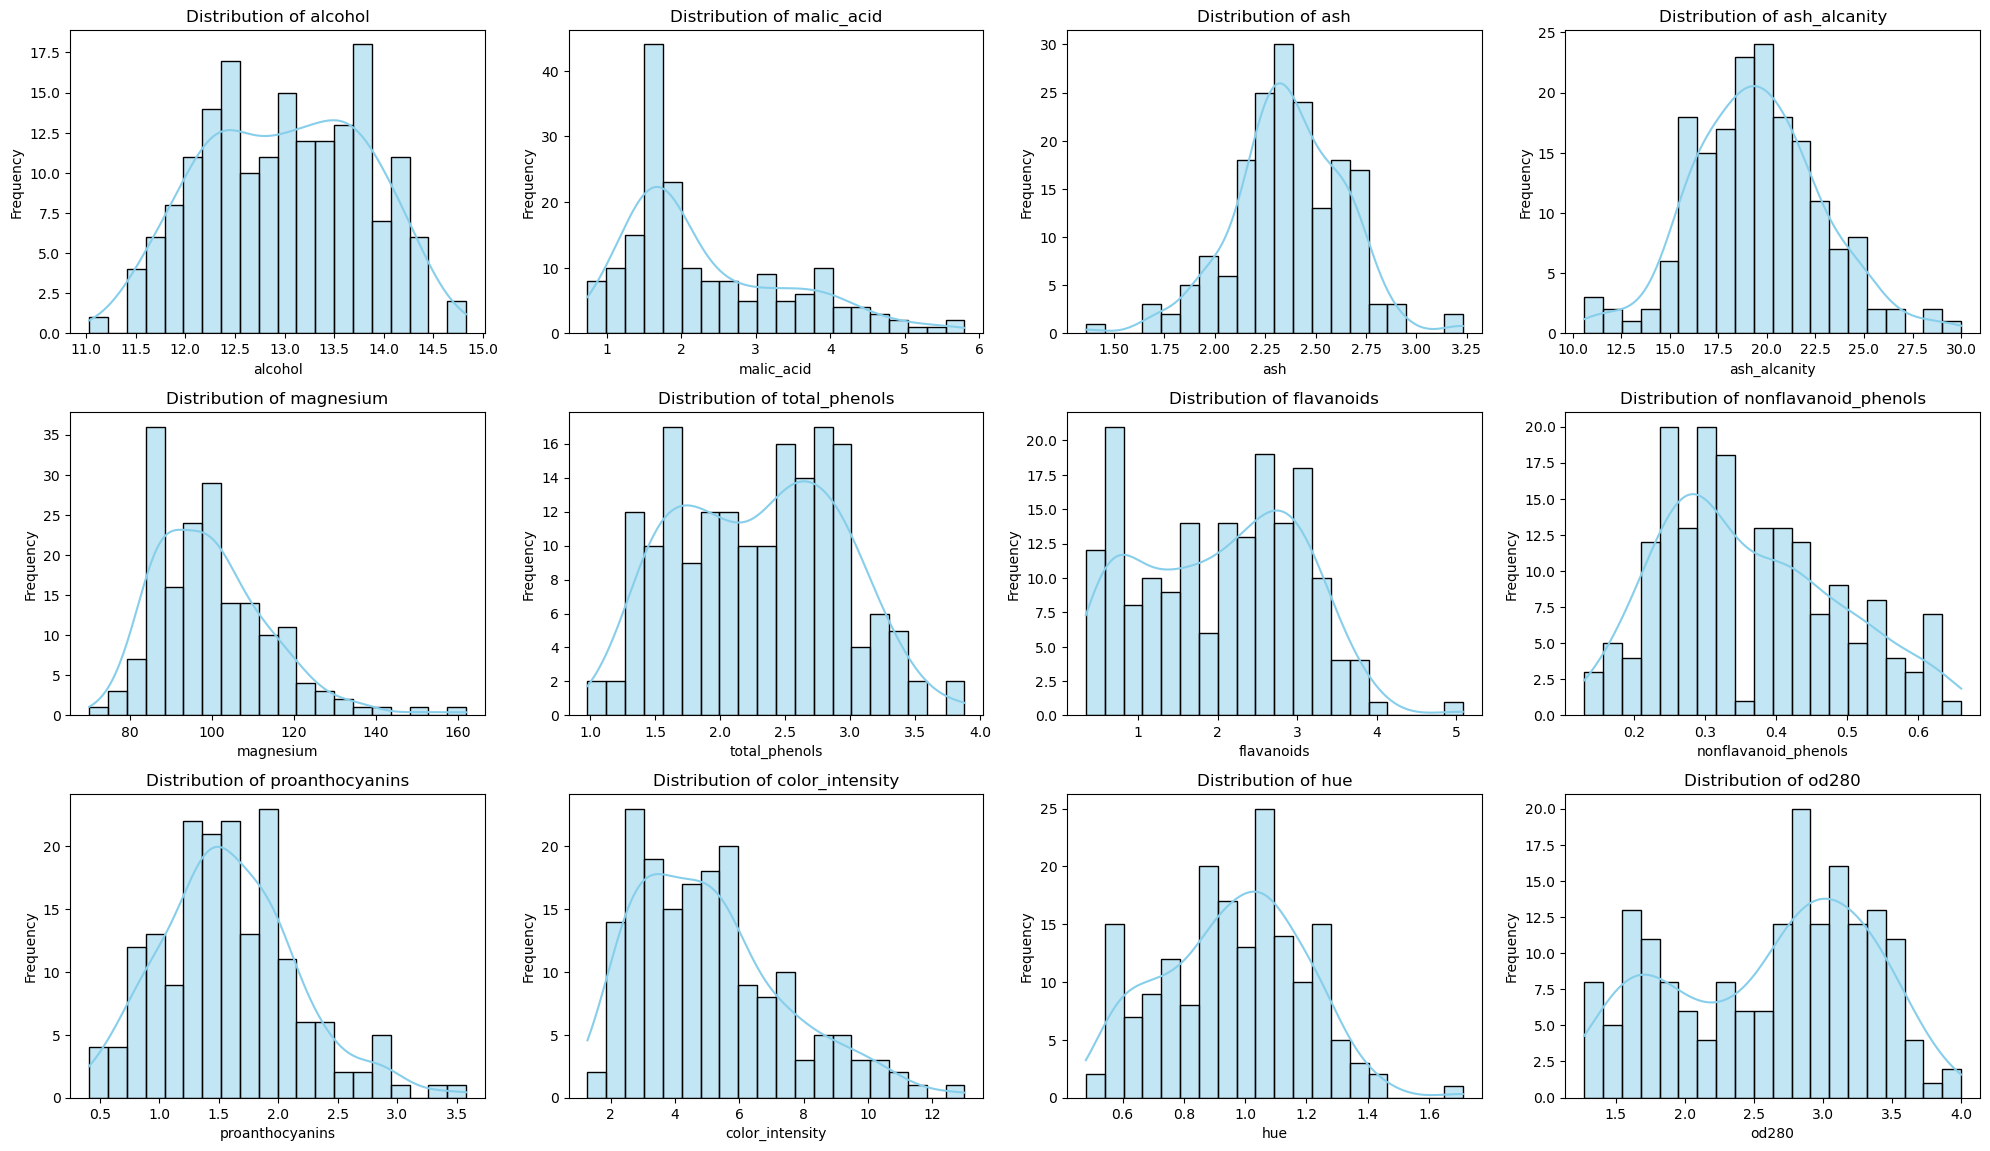

In [4]:
# Step 5: Visualize the distribution of each feature using histograms
# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through each column
for i, column in enumerate(data.columns[:-1]):  # Exclude 'Cluster' column if already added
    plt.subplot(4, 4, i+1)  # 4x4 grid for 13 features
    sns.histplot(data[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Task 2: Standardization

1. Use `StandardScaler` to standardize the numerical features, ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.

In [5]:


# show few rows
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

### Task 3: Initial DBSCAN Clustering

1. Apply DBSCAN clustering to the standardized data with `eps=2 and min_samples=2`.
2. Add the cluster labels to the original DataFrame.
3. Visualize the clusters using a scatter plot for a pair of features (e.g., alcohol and malic_acid).

In [6]:
# Step 1: Apply DBSCAN clustering to the standardized data with eps=2 and min_samples=2

dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
data['Cluster'] = clusters
print(data['Cluster'].value_counts())


Cluster
-1    178
Name: count, dtype: int64


In [7]:
# Assuming 'clusters' is the array returned by DBSCAN
data['Cluster'] = clusters

# Show the first 10 rows with cluster labels
print(data.head(10))


   alcohol  malic_acid   ash  ash_alcanity  magnesium  total_phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1

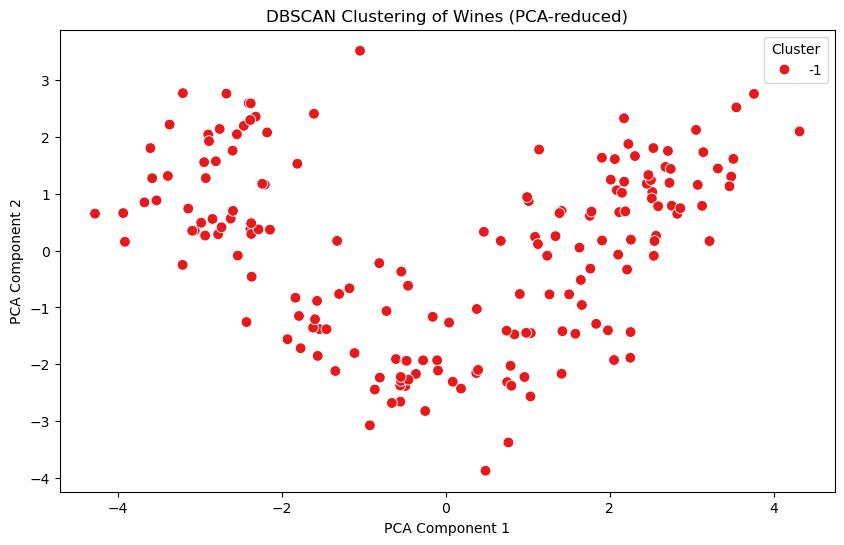

In [8]:

# Step 3: Visualize the clusters using a scatter plot for a pair of features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster'], palette='Set1', s=60)
plt.title("DBSCAN Clustering of Wines (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


### Task 4: Parameter Tuning

1. Experiment with different values of eps (2, 3.5, 4) and min_samples (2, 4, 6) to see how the clustering results change.
2. Visualize the clusters using scatter plots with different parameter settings for a pair of features (e.g., alcohol and malic_acid).

In [9]:
from sklearn.cluster import DBSCAN

# Define parameter grids
eps_values = [2, 3.5, 4]
min_samples_values = [2, 4, 6]

# Loop through all combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # exclude noise
        n_noise = list(clusters).count(-1)
        
        print(f"eps={eps}, min_samples={min_samples} --> Clusters: {n_clusters}, Noise points: {n_noise}")


eps=2, min_samples=2 --> Clusters: 9, Noise points: 56
eps=2, min_samples=4 --> Clusters: 6, Noise points: 66
eps=2, min_samples=6 --> Clusters: 3, Noise points: 100
eps=3.5, min_samples=2 --> Clusters: 2, Noise points: 3
eps=3.5, min_samples=4 --> Clusters: 1, Noise points: 6
eps=3.5, min_samples=6 --> Clusters: 1, Noise points: 7
eps=4, min_samples=2 --> Clusters: 2, Noise points: 0
eps=4, min_samples=4 --> Clusters: 1, Noise points: 3
eps=4, min_samples=6 --> Clusters: 1, Noise points: 3
